### Resample

This notebook resamples the data for each sections and from different languages to a common length, i.e. a common timeline. See text for description/justification. Also, behind this relatively simple notebook is a long line of reasoning and data-checking, including the audio-regression, the text-files etc., because there are several non-trivial, but important little pieces in which the datasets differ (presumably because different teams were involved in recording).

#### Import Modules

In [1]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
%matplotlib inline

#### Open the files and print their lengths

In [2]:
lenghts = np.zeros((3,9))

for curr_run in range(9):
    #print(curr_run+1)
    
    # English
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppEN-run-0" + str(curr_run+1) + ".npy")
    #print(curr_data.shape[0])    
    lenghts[0,curr_run] = curr_data.shape[0]

    # French
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppFR-run-0" + str(curr_run+1) + ".npy")
    #print(curr_data.shape[0])   
    lenghts[1,curr_run] = curr_data.shape[0]

    # Chinese
    curr_data = np.load("../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri/task-lppCN-run-0" + str(curr_run+1) + ".npy")
    #print(curr_data.shape[0])   
    lenghts[2,curr_run] = curr_data.shape[0]
    #print('###')

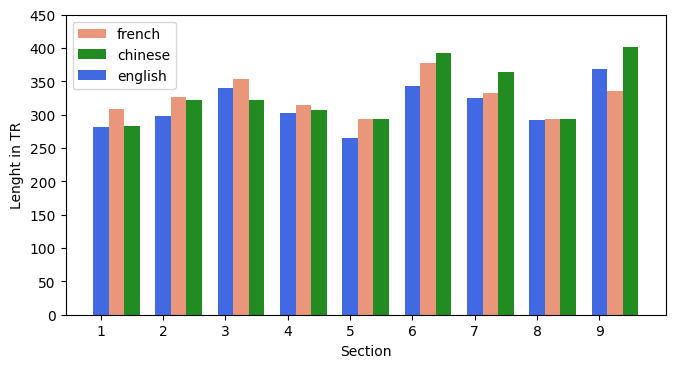

In [3]:
X = np.arange(9)

fig = plt.figure(figsize = (6,3));
ax = fig.add_axes([0,0,1,1]);
ax.bar(X + 0.25, lenghts[1,:], color = 'darksalmon', width = 0.25, label = 'french');
ax.bar(X + 0.50, lenghts[2,:], color = 'forestgreen', width = 0.25, label = 'chinese');
ax.bar(X + 0.00, lenghts[0,:], color = 'royalblue', width = 0.25, label = 'english');
plt.ylim([0, 450])
plt.xticks(np.arange(9), np.arange(9)+1)

plt.xlabel('Section')
plt.ylabel('Lenght in TR')

plt.legend();

In [4]:
lenghts

array([[282., 298., 340., 303., 265., 343., 325., 292., 368.],
       [309., 326., 354., 315., 293., 378., 332., 294., 336.],
       [283., 322., 322., 307., 293., 392., 364., 293., 401.]])

In [5]:
#the fairest way to align times across languages is to the common mean (after some consideration of pros/cons)
np.mean(lenghts, axis=0).astype(int)

array([291, 315, 338, 308, 283, 371, 340, 293, 368])

### resample

In [7]:
os.getcwd()

'/Users/schmaelz/Documents/01_GITHUB/nomcomm/GITHUB_PAPERS_WORKING/littleprince_multilingual/scripts/01_AudioAnalysis_Resampling'

In [8]:
import scipy.signal

target_size = [291, 315, 338, 308, 283, 371, 340, 293, 368]

# memory aid: the story behind this is like this: 
# I checked the duration of the MRI recordings and the last onset of the last word in the story files. 
# What I noticed was that while the  chinese recordrings were stopped at the duration of the last file, 
# the french and english recording lasted ca. 8 secs longer, anmounting to 4 TRs. This corrects for that. 

n_runs = 9
gen_path = "../../data_lpp/fmri_data/extract_ts/lpp_alllang_allruns_fmri"

for curr_run in range(n_runs):
    lang = "EN"
    path_pre = gen_path + "/task-lpp" + lang + "-run-0"
    path_pre_out = gen_path + "_resampled/task-lpp" + lang + "-run-0"
    curr_target_size = target_size[curr_run]
    curr_data = np.load(path_pre + str(curr_run+1) + ".npy")
    curr_data = curr_data[:-4,:,:]  # this is to correct for the english time different in offset
    n_time, n_roi, n_subjs = curr_data.shape    
    new_data = np.zeros((curr_target_size, n_roi, n_subjs))

    for curr_roi in range(n_roi):
        for curr_sub in range(n_subjs):
                new_data[:, curr_roi, curr_sub] = scipy.signal.resample(curr_data[:,curr_roi,curr_sub], curr_target_size, t=None, axis=0, window=None, domain='time')

    path_out = path_pre_out + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy"
    np.save(path_out, new_data)
    
for curr_run in range(n_runs):
    lang = "FR"
    path_pre = gen_path + "/task-lpp" + lang + "-run-0"
    path_pre_out = gen_path + "_resampled/task-lpp" + lang + "-run-0"
    curr_target_size = target_size[curr_run]
    curr_data = np.load(path_pre + str(curr_run+1) + ".npy")
    curr_data = curr_data[:-4,:,:]  # this is to correct for the french time difference in offset
    n_time, n_roi, n_subjs = curr_data.shape    
    new_data = np.zeros((curr_target_size, n_roi, n_subjs))

    for curr_roi in range(n_roi):
        for curr_sub in range(n_subjs):
                new_data[:, curr_roi, curr_sub] = scipy.signal.resample(curr_data[:,curr_roi,curr_sub], curr_target_size, t=None, axis=0, window=None, domain='time')

    path_out = path_pre_out + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy"
    np.save(path_out, new_data)
    
for curr_run in range(n_runs):
    lang = "CN"
    path_pre = gen_path + "/task-lpp" + lang + "-run-0"
    path_pre_out = gen_path + "_resampled/task-lpp" + lang + "-run-0"
    curr_target_size = target_size[curr_run]
    curr_data = np.load(path_pre + str(curr_run+1) + ".npy")
    n_time, n_roi, n_subjs = curr_data.shape    
    new_data = np.zeros((curr_target_size, n_roi, n_subjs))

    for curr_roi in range(n_roi):
        for curr_sub in range(n_subjs):
                new_data[:, curr_roi, curr_sub] = scipy.signal.resample(curr_data[:,curr_roi,curr_sub], curr_target_size, t=None, axis=0, window=None, domain='time')

    path_out = path_pre_out + str(curr_run+1) + "_resampled" + str(curr_target_size) + ".npy"
    np.save(path_out, new_data)
    


In [9]:
X = np.arange(9)
lenghts = np.asarray([291, 315, 338, 308, 283, 371, 340, 293, 368])
lenghts

array([291, 315, 338, 308, 283, 371, 340, 293, 368])

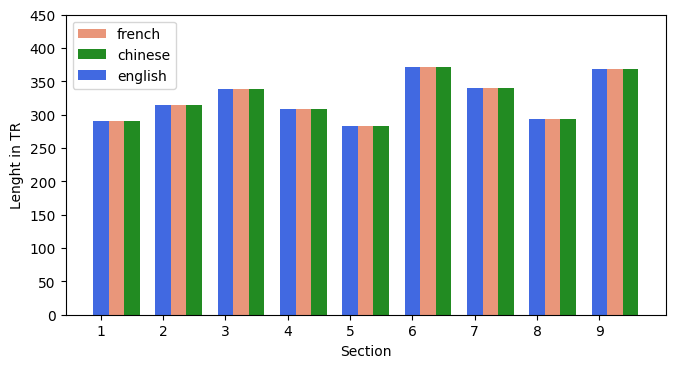

In [10]:
fig = plt.figure(figsize = (6,3));
ax = fig.add_axes([0,0,1,1]);
ax.bar(X + 0.25, lenghts[:], color = 'darksalmon', width = 0.25, label = 'french');
ax.bar(X + 0.50, lenghts[:], color = 'forestgreen', width = 0.25, label = 'chinese');
ax.bar(X + 0.00, lenghts[:], color = 'royalblue', width = 0.25, label = 'english');

plt.xticks(np.arange(9), np.arange(9)+1)
plt.ylim([0, 450])
plt.xlabel('Section')
plt.ylabel('Lenght in TR')

plt.legend();